In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [5]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [6]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [7]:
df.gender.value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

#### One Hot Encoding

>*I chose to do it with pandas but you can also do it with sklearn*

In [8]:
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation, prefix='occupation_').astype(int)] , axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass, prefix='workclass_').astype(int)] , axis=1)

df.drop('education', axis=1, inplace=True)

df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status'], prefix='marital-status_').astype(int)] , axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship, prefix='relationship_').astype(int)] , axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country'], prefix='native_country_').astype(int)] , axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df['race'], prefix='race_').astype(int)] , axis=1)

In [9]:
df.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation__?,occupation__Adm-clerical,...,native_country__Thailand,native_country__Trinadad&Tobago,native_country__United-States,native_country__Vietnam,native_country__Yugoslavia,race__Amer-Indian-Eskimo,race__Asian-Pac-Islander,race__Black,race__Other,race__White
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,1,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,1,0,0,0,0,0,0,1
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,1,0,0,0,0,0,0,1
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,1,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,1,0,0,0,0,0,0,1


#### gender encoding

In [10]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

#### income encoding

In [11]:
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [12]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation__?',
       'occupation__Adm-clerical', 'occupation__Armed-Forces',
       'occupation__Craft-repair', 'occupation__Exec-managerial',
       'occupation__Farming-fishing', 'occupation__Handlers-cleaners',
       'occupation__Machine-op-inspct', 'occupation__Other-service',
       'occupation__Priv-house-serv', 'occupation__Prof-specialty',
       'occupation__Protective-serv', 'occupation__Sales',
       'occupation__Tech-support', 'occupation__Transport-moving',
       'workclass__?', 'workclass__Federal-gov', 'workclass__Local-gov',
       'workclass__Never-worked', 'workclass__Private',
       'workclass__Self-emp-inc', 'workclass__Self-emp-not-inc',
       'workclass__State-gov', 'workclass__Without-pay',
       'marital-status__Divorced', 'marital-status__Married-AF-spouse',
       'marital-status__Married-civ-spouse',
       'marital-status__Married-

<Axes: >

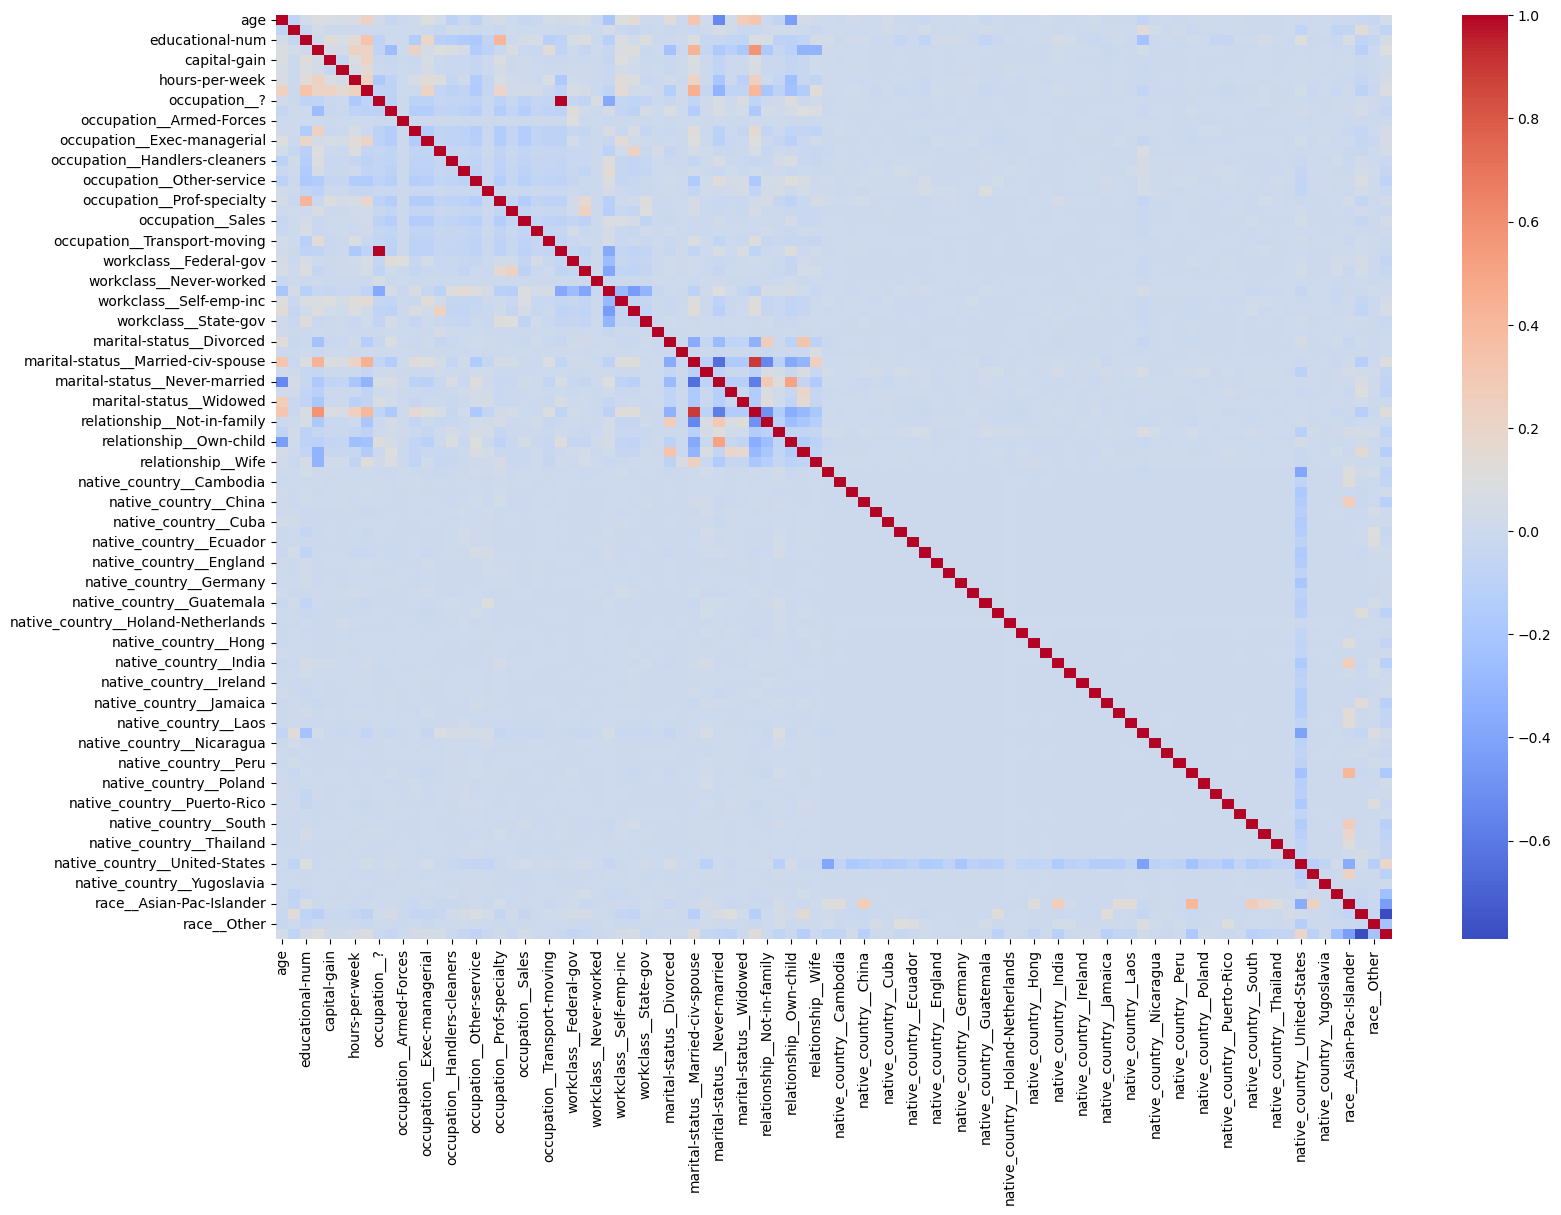

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')